# Jet Engine Failure
The objective of the competition is to predict the number of remaining operational cycles before failure in the test set, i.e., the number of operational cycles after the last cycle that the engine will continue to operate. Also provided a vector of true Remaining Useful Life (RUL) values for the test data.

https://data.nasa.gov/Aerospace/CMAPSS-Jet-Engine-Simulated-Data/ff5v-kuh6

In [114]:
import pandas as pd
import numpy as np

In [115]:
file = 'train_FD001.txt'
filename = '../data/external/' + file
print(filename)

../data/external/train_FD001.txt


In [116]:
#test/train data
data = pd.read_csv("../data/external/train_FD001.txt", sep=" ", header=None)
data = data.rename(columns={0: "UnitNumber", 1: "Cycle", 2: "OperationalSetting1", 
                     3: "OperationalSetting2", 4: "OperationalSetting3", 5: "SensorMeasurement1", 
                     6: "SensorMeasurement2", 7: "SensorMeasurement3", 8: "SensorMeasurement4",
                     9: "SensorMeasurement5", 10: "SensorMeasurement6", 11: "SensorMeasurement7",
                     12: "SensorMeasurement8", 13: "SensorMeasurement9", 14: "SensorMeasurement10",
                     15: "SensorMeasurement11", 16: "SensorMeasurement12", 17: "SensorMeasurement13",
                     18: "SensorMeasurement14", 19: "SensorMeasurement15", 20: "SensorMeasurement15",
                     21: "SensorMeasurement16", 22: "SensorMeasurement17", 23: "SensorMeasurement18",
                     24: "SensorMeasurement19", 25: "SensorMeasurement20"})

data = data.drop([26, 27], axis=1)

#
data2 = pd.read_csv("../data/external/RUL_FD001.txt", sep=" ", header=None)
data2 = data2.drop([1], axis=1)
data2 = data2.rename(columns={0: "FailureCycle"})
data2.index = np.arange(1, len(data2) + 1)
data2['Unit'] = data2.index
data2 = data2.reset_index()

data3 = data.merge(data2, left_on='UnitNumber', right_on='Unit')
data3 = data3.drop(['index', 'Unit'], axis=1)

In [117]:
data3

,UnitNumber,Cycle,OperationalSetting1,OperationalSetting2,OperationalSetting3,SensorMeasurement1,SensorMeasurement2,SensorMeasurement3,SensorMeasurement4,SensorMeasurement5,...,SensorMeasurement13,SensorMeasurement14,SensorMeasurement15,SensorMeasurement15,SensorMeasurement16,SensorMeasurement17,SensorMeasurement18,SensorMeasurement19,SensorMeasurement20,FailureCycle
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,112
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,112
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,112
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,112
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,20
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,20
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,20
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,20


In [125]:
data4 = data3.loc[data3['UnitNumber'] == 1]

In [121]:
dataforreg = data3.query('Cycle == FailureCycle').reset_index()

In [122]:
dataforreg = dataforreg[['FailureCycle', 'SensorMeasurement2', 'SensorMeasurement3', 
                         'SensorMeasurement7', 'SensorMeasurement14', 'SensorMeasurement16']]

In [123]:
dataforreg

,UnitNumber,FailureCycle,SensorMeasurement2,SensorMeasurement3,SensorMeasurement7,SensorMeasurement14,SensorMeasurement16
0,1,112,642.66,1586.46,553.19,8131.52,394
1,2,98,641.73,1587.84,554.57,8140.08,391
2,3,69,642.05,1581.93,555.14,8139.20,392
3,4,82,642.66,1582.04,553.76,8136.00,392
4,5,91,642.40,1584.88,554.37,8151.87,391
...,...,...,...,...,...,...,...
94,96,137,642.24,1585.92,553.64,8132.43,394
95,97,82,642.17,1587.36,553.62,8136.02,392
96,98,59,642.33,1584.25,554.89,8143.92,393
97,99,117,642.27,1592.28,553.24,8132.91,391


In [146]:
data5 = data3.loc[data3['Cycle'] == 1]

In [147]:
data5 = data5[['SensorMeasurement2', 'SensorMeasurement3', 
                         'SensorMeasurement7', 'SensorMeasurement14', 'SensorMeasurement16', 'FailureCycle', 'UnitNumber']]




In [148]:
data5

,SensorMeasurement2,SensorMeasurement3,SensorMeasurement7,SensorMeasurement14,SensorMeasurement16,FailureCycle,UnitNumber
0,641.82,1589.70,554.36,8138.62,392,112,1
192,641.89,1583.84,554.53,8137.72,391,98,2
479,642.04,1584.20,553.96,8138.40,391,69,3
658,642.60,1585.40,553.97,8131.50,393,82,4
847,641.77,1583.59,554.39,8152.22,393,91,5
...,...,...,...,...,...,...,...
19552,642.03,1579.12,554.92,8133.36,392,137,96
19888,642.01,1581.83,554.31,8130.81,391,82,97
20090,642.30,1580.93,554.16,8150.69,392,59,98
20246,641.69,1586.17,554.09,8131.23,391,117,99


In [151]:
result = data5.merge(dataforreg, left_on=['FailureCycle', 'UnitNumber'], right_on=['FailureCycle','UnitNumber'])

In [153]:
result.columns

Index(['SensorMeasurement2_x', 'SensorMeasurement3_x', 'SensorMeasurement7_x',
       'SensorMeasurement14_x', 'SensorMeasurement16_x', 'FailureCycle',
       'UnitNumber', 'SensorMeasurement2_y', 'SensorMeasurement3_y',
       'SensorMeasurement7_y', 'SensorMeasurement14_y',
       'SensorMeasurement16_y'],
      dtype='object')

In [155]:
result['sensor2'] = result['SensorMeasurement2_y'] - result['SensorMeasurement2_x']
result['sensor3'] = result['SensorMeasurement3_y'] - result['SensorMeasurement3_x']
result['sensor7'] = result['SensorMeasurement7_y'] - result['SensorMeasurement7_x']
result['sensor14'] = result['SensorMeasurement14_y'] - result['SensorMeasurement14_x']
result['sensor16'] = result['SensorMeasurement16_y'] - result['SensorMeasurement16_x']
result = result.drop(['SensorMeasurement2_x', 'SensorMeasurement3_x', 'SensorMeasurement7_x',
                     'SensorMeasurement14_x', 'SensorMeasurement16_x', 'UnitNumber', 
                      'SensorMeasurement2_y', 'SensorMeasurement3_y', 'SensorMeasurement7_y', 
                      'SensorMeasurement14_y', 'SensorMeasurement16_y'], axis=1)


In [158]:
result.columns

Index(['FailureCycle', 'sensor2', 'sensor3', 'sensor7', 'sensor14',
       'sensor16'],
      dtype='object')

In [157]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [161]:
X = result[['sensor2', 'sensor3', 'sensor7', 'sensor14',
       'sensor16']]
X = sm.add_constant(X)
y = result[['FailureCycle']]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.262    
Dependent Variable: FailureCycle     AIC:                993.9891 
Date:               2023-03-02 18:44 BIC:                1009.5599
No. Observations:   99               Log-Likelihood:     -490.99  
Df Model:           5                F-statistic:        7.973    
Df Residuals:       93               Prob (F-statistic): 2.74e-06 
R-squared:          0.300            Scale:              1266.1   
-------------------------------------------------------------------
              Coef.    Std.Err.     t     P>|t|    [0.025    0.975]
-------------------------------------------------------------------
const         57.7680    4.5128  12.8010  0.0000   48.8065  66.7294
sensor2       15.9048    8.4143   1.8902  0.0618   -0.8042  32.6139
sensor3        2.0097    0.6964   2.8859  0.0049    0.6268   3.3926
sensor7      -17.1282    5.1597  -3.3196  0.0013  -27.3744  -6.8820
sensor

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

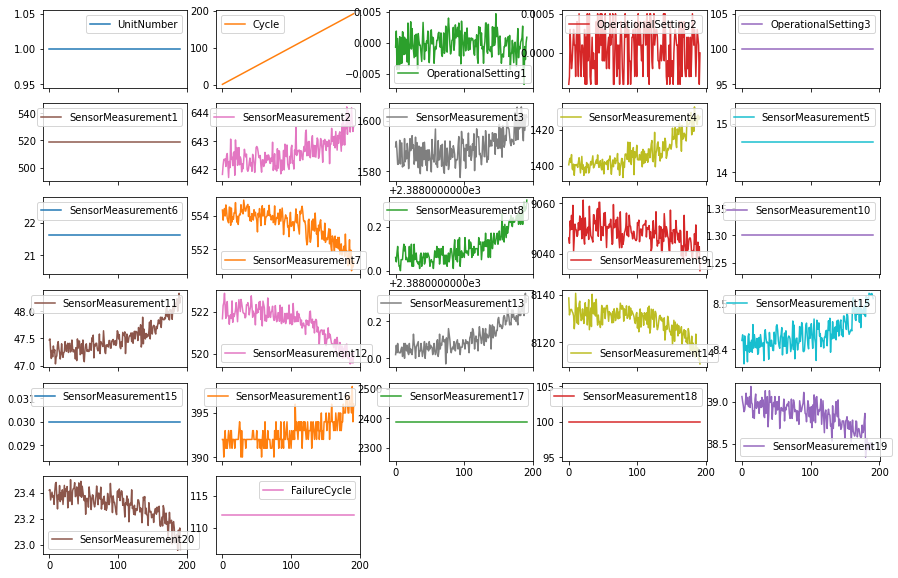

In [93]:
import matplotlib.pyplot as plt
#ax = data4.plot(subplots=True, layout=(6,5),  figsize=(15,10))
data4.plot(subplots=True, layout=(6,5),  figsize=(15,10))
#ax.axvline(x = 112, color = 'b')

# Notes

Some sensors have no data, are the same value across all engine cycles

In [ ]:
SplineTermAge = dataset['PatientAge']
spineterm = dmatrix("cc(SplineTermAge, df=3) - 1", {"x": SplineTermAge}, return_type = 'dataframe')
x = x.join(spineterm)